In [4]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm 

In [6]:
def create_color_to_label_map(mask_folder_path):
    """
    Scans all masks in a folder to find unique colors and create a mapping
    from color to a class label.
    """
    print(f"Scanning masks in '{mask_folder_path}'...")
    
    unique_colors = set()
    

    mask_files = os.listdir(mask_folder_path)
    print(mask_files)
   
    for filename in tqdm(mask_files, desc="Finding unique colors"):
        mask_path = os.path.join(mask_folder_path, filename)
        
        # Open the mask image and convert to a NumPy array
        mask_bgr = cv2.imread(mask_path)

        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
        # Reshape the (H, W, C) array to (H*W, C) to get a list of pixels
        pixels = mask_rgb.reshape(-1, 3)
        
        # Get unique rows (unique RGB colors)
        unique_pixel_colors = np.unique(pixels, axis=0)
        
        # Add the unique colors found in this image to our overall set
        for color in unique_pixel_colors:
            unique_colors.add(tuple(color))
            

    sorted_colors = sorted(list(unique_colors))
    
    # Create the color-to-label dictionary
    color_to_label = {color: label for label, color in enumerate(sorted_colors)}
    
    print("\nScan complete!")
    print(f"Found {len(color_to_label)} unique classes.")
    
    return color_to_label

In [8]:
mask_path = r"C:\Users\kyawt\Desktop\Wai Assignment\4_image_processing_techniques\img_lab\data_dataset_voc\SegmentationClass"
COLOR_TO_LABEL = create_color_to_label_map(mask_path)
COLOR_TO_LABEL

Scanning masks in 'C:\Users\kyawt\Desktop\Wai Assignment\4_image_processing_techniques\img_lab\data_dataset_voc\SegmentationClass'...
['cat.2366.png', 'cat.2367.png', 'cat.2368.png', 'cat.2369.png', 'cat.2370.png', 'cat.2371.png', 'cat.2372.png', 'cat.2373.png', 'cat.2374.png', 'cat.2375.png', 'cat.2376.png', 'cat.2377.png', 'cat.2378.png', 'cat.2379.png', 'cat.2380.png', 'cat.2381.png', 'cat.2382.png', 'cat.2383.png', 'cat.2384.png', 'cat.2385.png', 'cat.2386.png', 'cat.2387.png', 'cat.2388.png', 'cat.2389.png', 'cat.2390.png', 'cat.2391.png', 'cat.2392.png', 'cat.2393.png', 'cat.2394.png', 'cat.2395.png', 'cat.2396.png', 'cat.2397.png', 'cat.2398.png', 'cat.2399.png', 'cat.2400.png', 'cat.2401.png', 'cat.2402.png', 'cat.2403.png', 'cat.2404.png', 'cat.2405.png', 'cat.2406.png', 'cat.2407.png', 'cat.2408.png', 'cat.2409.png', 'cat.2410.png', 'cat.2411.png', 'cat.2412.png', 'cat.2413.png', 'cat.2414.png', 'cat.2415.png', 'cat.2416.png', 'cat.2417.png', 'cat.2418.png', 'cat.2419.png', '

Finding unique colors: 100%|██████████| 200/200 [00:24<00:00,  8.11it/s]


Scan complete!
Found 3 unique classes.


{(np.uint8(0), np.uint8(0), np.uint8(0)): 0,
 (np.uint8(0), np.uint8(128), np.uint8(0)): 1,
 (np.uint8(128), np.uint8(0), np.uint8(0)): 2}

In [9]:
import numpy as np
import cv2
from PIL import Image

def encode_mask_to_grayscale(mask_path, color_map):
    """
    Converts an RGB segmentation mask to a grayscale mask with class labels.
    """
    mask_bgr = cv2.imread(mask_path)
    mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
    height, width, _ = mask_rgb.shape
    
    # Create an empty grayscale mask (height x width)
    mask_grayscale = np.zeros((height, width), dtype=np.uint8)
    
    # For each color in our map, find where it is in the mask and assign the label
    for color, label in color_map.items():
        # Find pixels matching the color
        matches = np.where(np.all(mask_rgb == color, axis=-1))
        mask_grayscale[matches] = label
        
    return mask_grayscale




In [10]:
mask_path = r"C:\Users\kyawt\Desktop\Wai Assignment\4_image_processing_techniques\img_lab\data_dataset_voc\SegmentationClass\cat.2366.png" 
grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)

In [13]:
from glob import glob

mask_files = glob(os.path.join(r"C:\Users\kyawt\Desktop\Wai Assignment\4_image_processing_techniques\img_lab\data_dataset_voc", "SegmentationClass", "*.*"))
print(mask_files)

['C:\\Users\\kyawt\\Desktop\\Wai Assignment\\4_image_processing_techniques\\img_lab\\data_dataset_voc\\SegmentationClass\\cat.2366.png', 'C:\\Users\\kyawt\\Desktop\\Wai Assignment\\4_image_processing_techniques\\img_lab\\data_dataset_voc\\SegmentationClass\\cat.2367.png', 'C:\\Users\\kyawt\\Desktop\\Wai Assignment\\4_image_processing_techniques\\img_lab\\data_dataset_voc\\SegmentationClass\\cat.2368.png', 'C:\\Users\\kyawt\\Desktop\\Wai Assignment\\4_image_processing_techniques\\img_lab\\data_dataset_voc\\SegmentationClass\\cat.2369.png', 'C:\\Users\\kyawt\\Desktop\\Wai Assignment\\4_image_processing_techniques\\img_lab\\data_dataset_voc\\SegmentationClass\\cat.2370.png', 'C:\\Users\\kyawt\\Desktop\\Wai Assignment\\4_image_processing_techniques\\img_lab\\data_dataset_voc\\SegmentationClass\\cat.2371.png', 'C:\\Users\\kyawt\\Desktop\\Wai Assignment\\4_image_processing_techniques\\img_lab\\data_dataset_voc\\SegmentationClass\\cat.2372.png', 'C:\\Users\\kyawt\\Desktop\\Wai Assignment\\4_i

In [17]:
import matplotlib.pyplot as plt
for mask_path in mask_files:
    grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)
    save_path = os.path.join(r"C:\Users\kyawt\Desktop\Wai Assignment\4_image_processing_techniques\img_lab\data_dataset_voc","encoded_masks", os.path.basename(mask_path))
    cv2.imwrite(save_path, grayscale_label_mask)

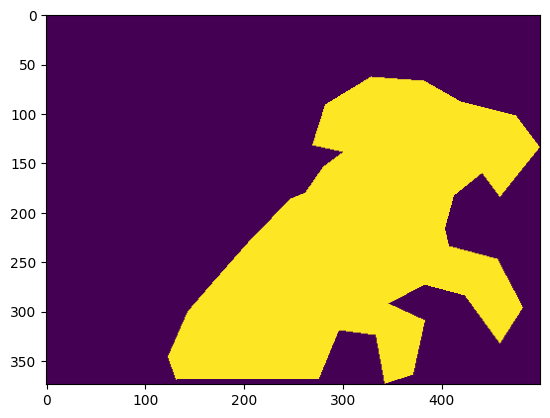

In [19]:
import matplotlib.pyplot as plt
save_path = r"C:\Users\kyawt\Desktop\Wai Assignment\4_image_processing_techniques\img_lab\data_dataset_voc\encoded_masks\cat.2366.png"

cv2.imwrite(save_path, grayscale_label_mask)
plt.imshow(grayscale_label_mask)

### Reread the encoded mask

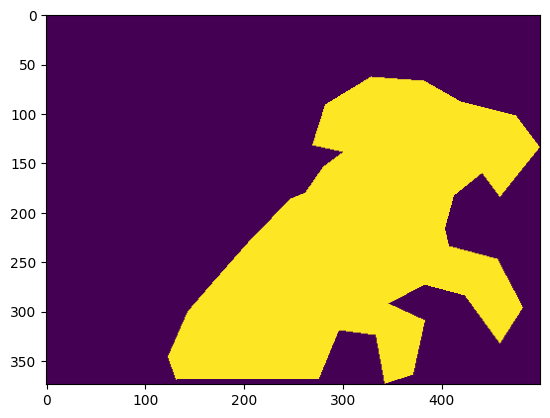

In [20]:

new_grayscale_label_mask = cv2.imread(save_path)
new_grayscale_label_mask = cv2.cvtColor(new_grayscale_label_mask, cv2.COLOR_BGR2GRAY)
plt.imshow(new_grayscale_label_mask)